<a href="https://colab.research.google.com/github/kklambotskij/CardGame-AR/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First task
Correlation for all table


                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0.428440         -0.366126
petal length (cm)           0.871754         -0.428440           1.000000          0.962865
petal width (cm)            0.817941         -0.366126           0.962865          1.000000


Correlation for data grouped by class name


                              sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
name                                                                                                  
setosa     sepal length (cm)           1.000000          0.742547           0.267176          0.278098
           sepal width (cm)            0.742547          1.000000           0.177700          0.232752
           petal length (cm)           0.2

<ipython-input-1-9e113f9ed734>:202: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Fourth task


/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:492: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(
/usr/local/lib/python3.8/dist-packages/sympy/plotting/plot.py:1191: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = self.plt.figure(figsize=parent.size)


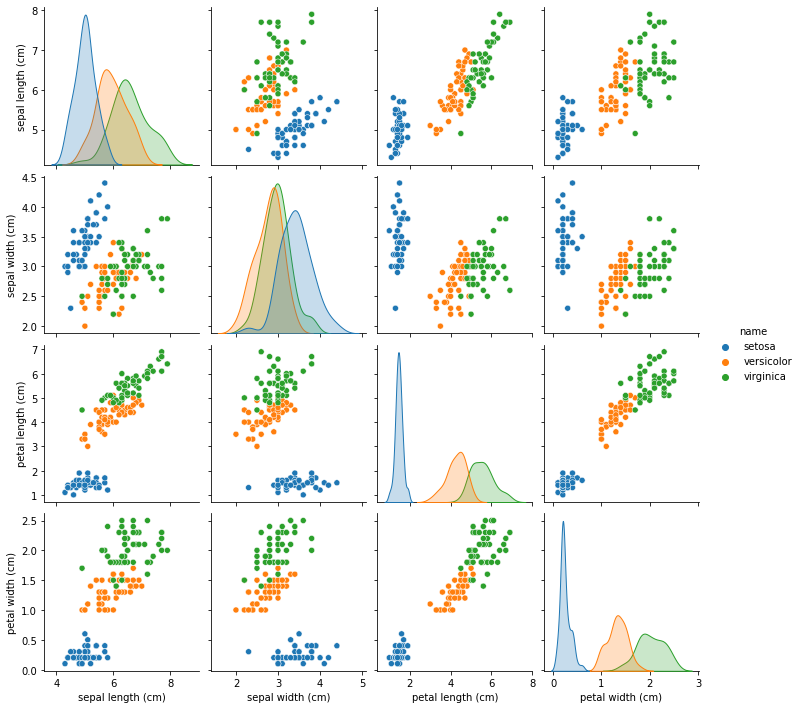

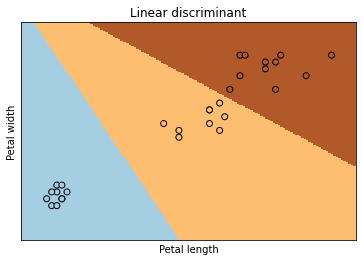

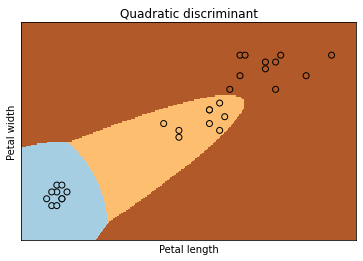

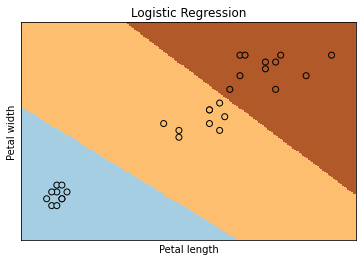

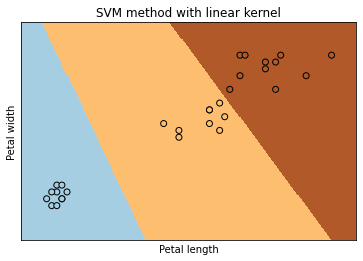

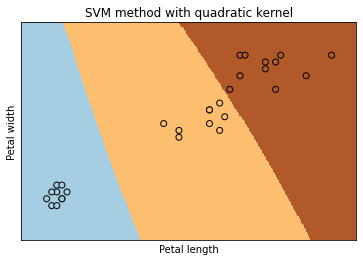

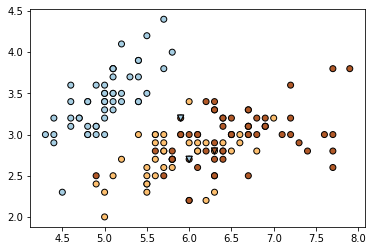

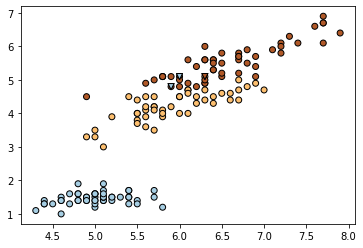

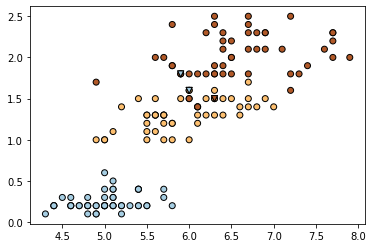

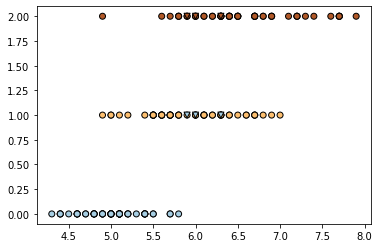

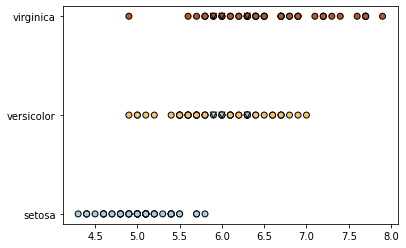

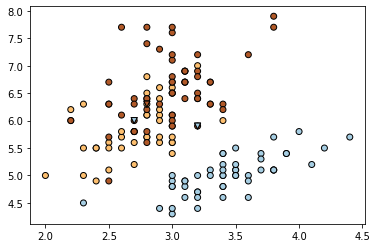

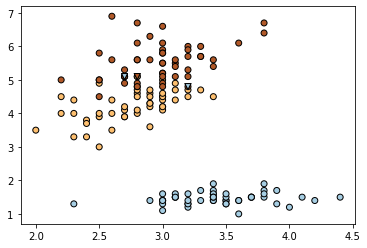

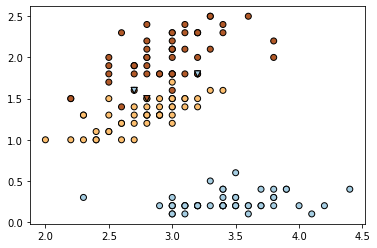

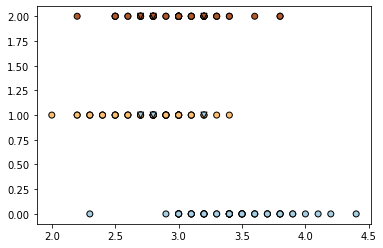

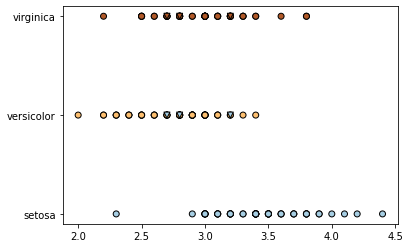

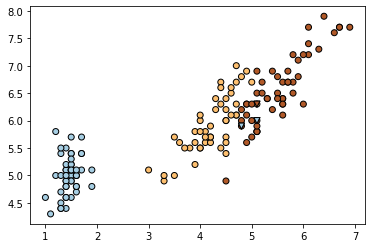

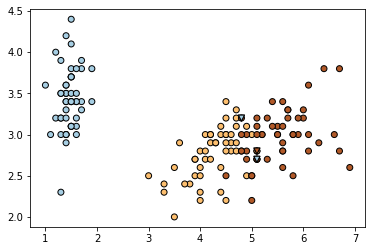

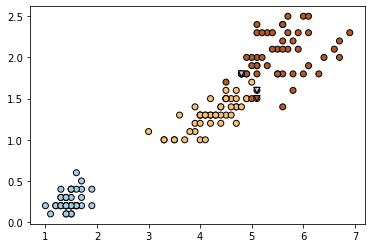

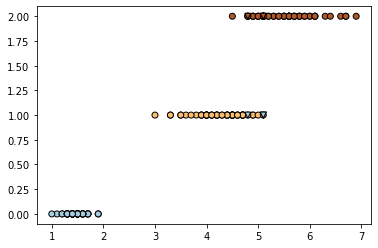

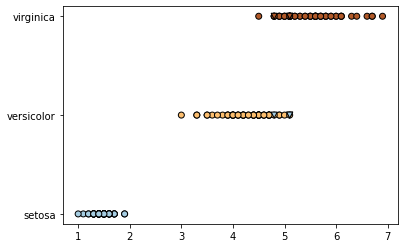

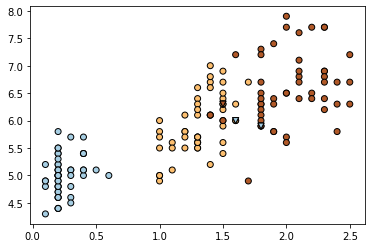

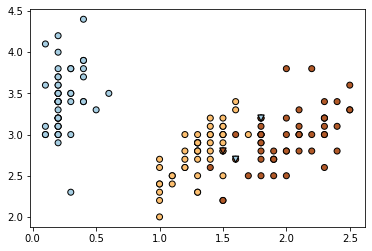

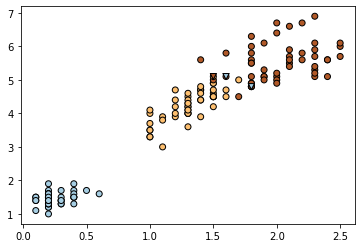

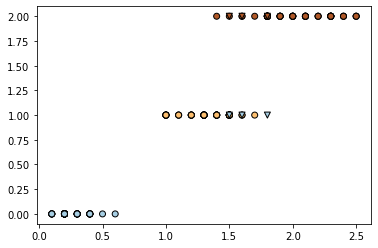

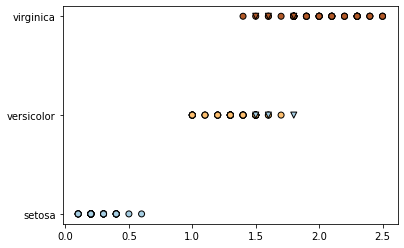

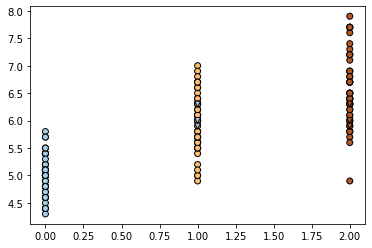

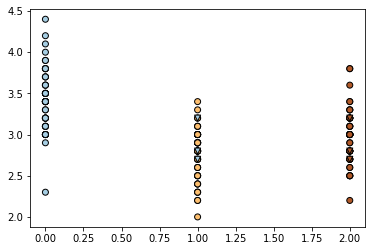

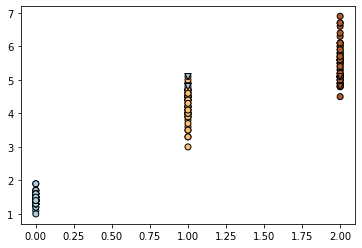

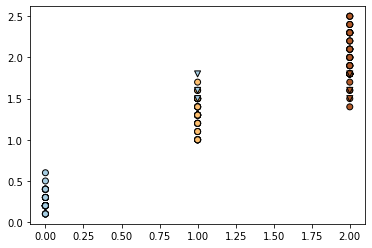

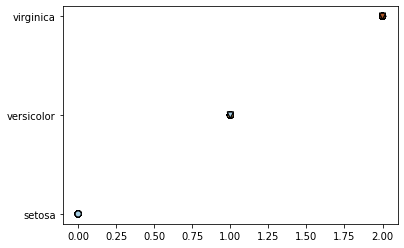

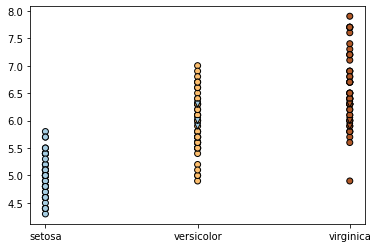

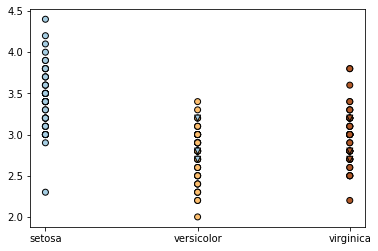

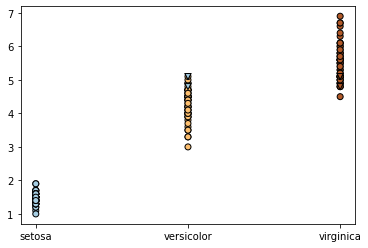

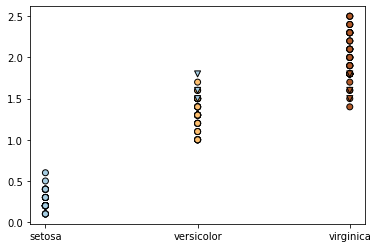

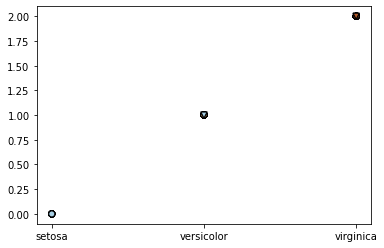

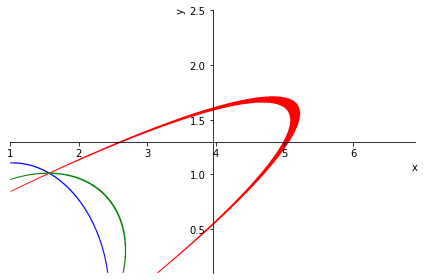

In [1]:
from sklearn import datasets
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import seaborn as sns
import numpy as np
from sympy import *


def calculateFunctions(experiment_data, target):
    first_class_data = decomposeDataByClasses(experiment_data, target, 0)
    second_class_data = decomposeDataByClasses(experiment_data, target, 1)
    third_class_data = decomposeDataByClasses(experiment_data, target, 2)
    x, y = symbols('x y')
    x_min = min(experiment_data[:, 0])
    x_max = max(experiment_data[:, 0])
    y_min = min(experiment_data[:, 1])
    y_max = max(experiment_data[:, 1])

    probabilities = [
        calculateProbability(target, 0),
        calculateProbability(target, 1),
        calculateProbability(target, 2)
    ]

    mathematical_expectations = [
        calculateMathematicalExpectation(first_class_data),
        calculateMathematicalExpectation(second_class_data),
        calculateMathematicalExpectation(third_class_data)
    ]
    covariance_matrices = [
        calculateCovarianceMatrix(first_class_data, mathematical_expectations[0]),
        calculateCovarianceMatrix(second_class_data, mathematical_expectations[1]),
        calculateCovarianceMatrix(third_class_data, mathematical_expectations[2])
    ]
    first_function = Eq(simplify(buildFunctionEquation([covariance_matrices[0], covariance_matrices[1]],
                                                           [mathematical_expectations[0], mathematical_expectations[1]],
                                                           [probabilities[0], probabilities[1]], x, y)))
    second_function = Eq(simplify(buildFunctionEquation([covariance_matrices[1], covariance_matrices[2]],
                                                            [mathematical_expectations[1],
                                                             mathematical_expectations[2]],
                                                            [probabilities[1], probabilities[2]], x, y)))
    third_function = Eq(simplify(buildFunctionEquation([covariance_matrices[0], covariance_matrices[2]],
                                                           [mathematical_expectations[0], mathematical_expectations[2]],
                                                           [probabilities[0], probabilities[2]], x, y)))

    graph1 = plot_implicit(first_function, (x, x_min, x_max), (y, y_min, y_max), show=False, line_color='blue')
    graph2 = plot_implicit(second_function, (x, x_min, x_max), (y, y_min, y_max), show=False, line_color='red')
    graph3 = plot_implicit(third_function, (x, x_min, x_max), (y, y_min, y_max), show=False, line_color='green')

    graph1.append(graph2[0])
    graph1.append(graph3[0])
    graph1.show()

  
def buildFunctionEquation(covariance_matrices, mathematical_expectations, probabilities, x, y):
    variables_minus_mean = Matrix([x - mathematical_expectations[0][0], y - mathematical_expectations[0][1]])
    q1 = Matrix(covariance_matrices[0])
    det_q1 = q1.det()
    q1 = q1.inv()
    q1 = variables_minus_mean.transpose() * q1 * variables_minus_mean
    variables_minus_mean = Matrix([x - mathematical_expectations[1][0], y - mathematical_expectations[1][1]])
    q2 = Matrix(covariance_matrices[1])
    det_q2 = q2.det()
    q2 = q2.inv()
    q2 = variables_minus_mean.transpose() * q2 * variables_minus_mean
    return sympify((q2 - q1)[0, 0] + ln(sqrt(det_q2) / sqrt(det_q1)) + ln(probabilities[0] / probabilities[1]))


def decomposeDataByClasses(experiment_data, experiment_data_target, class_index):
    experiment_data_size = len(experiment_data)
    class_data = []
    for i in range(experiment_data_size):
        if experiment_data_target[i] == class_index:
            class_data.append([experiment_data[i][0], experiment_data[i][1]])
    return class_data


def calculateProbability(experiment_data_target, class_index):
    n = len(experiment_data_target)
    n1 = 0

    for i in range(n):
        if experiment_data_target[i] == class_index:
            n1 = n1 + 1

    return n1 / n


def calculateMathematicalExpectation(experiment_data):
    mathematical_expectations = []
    experiment_data_size = len(experiment_data)
    first_variable_sum = 0
    second_variable_sum = 0
    for i in range(experiment_data_size):
        first_variable_sum = first_variable_sum + experiment_data[i][0]
        second_variable_sum = second_variable_sum + experiment_data[i][1]

    mathematical_expectations.append(first_variable_sum / experiment_data_size)
    mathematical_expectations.append(second_variable_sum / experiment_data_size)
    return mathematical_expectations


def calculateDispersion(experiment_data, mathematical_expectations):
    dispersions = []
    experiment_data_size = len(experiment_data)
    first_variable_sum = 0
    second_variable_sum = 0
    for i in range(experiment_data_size):
        first_variable_sum = first_variable_sum + (experiment_data[i][0] - mathematical_expectations[0]) ** 2
        second_variable_sum = second_variable_sum + (experiment_data[i][1] - mathematical_expectations[1]) ** 2

    dispersions.append(first_variable_sum / (experiment_data_size - 1))
    dispersions.append(second_variable_sum / (experiment_data_size - 1))
    return dispersions


def calculateCovarianceMatrix(experiment_data, mathematical_expectations):
    covariance_matrix = []
    non_diagonal_element = 0
    diagonal_elements = calculateDispersion(experiment_data, mathematical_expectations)
    experiment_data_size = len(experiment_data)
    for i in range(experiment_data_size):
        non_diagonal_element = non_diagonal_element + (experiment_data[i][0] - mathematical_expectations[0]) * \
                               (experiment_data[i][1] - mathematical_expectations[1])
    non_diagonal_element = non_diagonal_element / (experiment_data_size - 1)
    covariance_matrix.append([diagonal_elements[0], non_diagonal_element])
    covariance_matrix.append([non_diagonal_element, diagonal_elements[1]])
    return covariance_matrix


def plotWithPredictionsByMethods(experiment_data, target_data, test_size,
                                           method_for_prediction, x_label, y_label, plot_title):
    output_file = open('accuracies.txt', "w")

    train_features_data, test_features_data, train_target_data, test_target_data = \
        train_test_split(experiment_data, target_data, test_size=test_size, random_state=42)
    method_for_prediction.fit(train_features_data, train_target_data)

    x_min, x_max = test_features_data[:, 0].min() - .5, test_features_data[:, 0].max() + .5
    y_min, y_max = test_features_data[:, 1].min() - .5, test_features_data[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    prediction = method_for_prediction.predict(np.c_[xx.ravel(), yy.ravel()])
    prediction_for_accuracy = method_for_prediction.predict(test_features_data)
    prediction = prediction.reshape(xx.shape)

    output_file.write('\nAccuracy for graph ' + plot_title + ' for features [' + x_label + '_' + y_label + ']\n')
    output_file.write(str(accuracy_score(test_target_data, prediction_for_accuracy)))

    plt.figure()

    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.pcolormesh(xx, yy, prediction, cmap=plt.cm.Paired)
    plt.scatter(test_features_data[:, 0], test_features_data[:, 1], c=test_target_data,
                edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())


def drawPredictedByLinearDiscriminant(experiment_data):
    linear_discriminant = LinearDiscriminantAnalysis()
    linear_discriminant.fit(experiment_data.data, experiment_data.target)
    predicted_data_set = linear_discriminant.predict(experiment_data.data)
    predicted_data_frame = DataFrame(experiment_data.data)
    predicted_data_frame.columns = experiment_data.feature_names
    predicted_data_frame['target'] = predicted_data_set
    predicted_data_frame['name'] = nameColumn(predicted_data_set)
    
#     sns.pairplot(predicted_data_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
#         , 'name']], markers=["o", "s", "D"], hue='name')
    wrong_precision_data, wrong_precision_target_predicted, wrong_precision_target_corrected =\
        getWrongPredictedPoints(experiment_data.data, experiment_data.target, predicted_data_set)
    wrong_precision_data = makeList(wrong_precision_data, wrong_precision_data)
    wrong_precision_target = makeList(wrong_precision_target_predicted, wrong_precision_target_corrected)
    wrong_precision_data_frame = DataFrame(wrong_precision_data)
    wrong_precision_data_frame.columns = experiment_data.feature_names
    wrong_precision_data_frame['target'] = wrong_precision_target
    wrong_precision_data_frame['name'] = nameColumn(wrong_precision_target)
    #sns.pairplot(wrong_precision_data_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
   #                                          'petal width (cm)', 'name']], hue='name')
    
    drawPyPlot(predicted_data_frame, wrong_precision_data_frame)
    
def drawPyPlot(predicted_data_frame, wrong_precision_data_frame):
    for first in predicted_data_frame[:]:
        for second in predicted_data_frame[:]:
            if (first != second):
                plt.figure()

                        #plt.pcolormesh(xx, yy, prediction, cmap=plt.cm.Paired)
                plt.scatter(predicted_data_frame[first], predicted_data_frame[second], c=predicted_data_frame['target'], edgecolors='k', cmap=plt.cm.Paired)
                plt.scatter(wrong_precision_data_frame[first], 
                            wrong_precision_data_frame[second], 
                            c=wrong_precision_data_frame['target'], 
                            edgecolors='k',
                            marker='v',
                            cmap=plt.cm.Paired)
#             plt.scatter(x_wrong, y_wrong, c=test_target_data, edgecolors='k', cmap=plt.cm.Paired)


def nameColumn(target_data):
    result = []
    size = len(target_data)
    for i in range(size):
        if target_data[i] == 0:
            result.append('setosa')
        if target_data[i] == 1:
            result.append('versicolor')
        if target_data[i] == 2:
            result.append('virginica')
        if target_data[i] == 3:
            result.append('setosa_predicted')
        if target_data[i] == 4:
            result.append('versicolor_predicted')
        if target_data[i] == 5:
            result.append('virginica_predicted')
    return result


def getWrongPredictedPoints(experiment_data, experiment_target, predicted_data):
    result_data = []
    result_target_predicted = []
    result_target_corrected = []
    size = len(experiment_data)
    for i in range(size):
        if experiment_target[i] != predicted_data[i]:
            result_data.append(experiment_data[i])
            result_target_predicted.append(predicted_data[i]) #+3
            result_target_corrected.append(experiment_target[i])
    return result_data, result_target_predicted, result_target_corrected


def makeList(vector1, vector2):
    result = []
    size1 = len(vector1)
    size2 = len(vector2)
    for i in range(size1):
        result.append(vector1[i])
    for i in range(size2):
        result.append(vector2[i])
    return result



print('First task')

iris_data = datasets.load_iris()
test_size = 0.20

iris_frame = DataFrame(iris_data.data)
iris_frame.columns = iris_data.feature_names
iris_frame['target'] = iris_data.target
iris_frame['name'] = iris_frame.target.apply(lambda x: iris_data.target_names[x])

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

correlation = iris_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
print("Correlation for all table\n\n")
print(correlation.to_string())

print("\n\nCorrelation for data grouped by class name\n\n")

group_correlation = \
    iris_frame[['name', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].\
        groupby('name').corr()
print(group_correlation.to_string())

sns.pairplot(iris_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'name']],
             hue='name')


print('Second task')

SecondTwoFeatures = iris_data.data[:, 2:]
target = iris_data.target


linear_discriminant = LinearDiscriminantAnalysis()

plotWithPredictionsByMethods(SecondTwoFeatures, target, test_size, linear_discriminant,
                                       feature_names[2], feature_names[3], 'Linear discriminant')


quadratic_discriminant = QuadraticDiscriminantAnalysis()

plotWithPredictionsByMethods(SecondTwoFeatures, target, test_size, quadratic_discriminant,
                                       feature_names[2], feature_names[3], 'Quadratic discriminant')


logistic_regression = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

plotWithPredictionsByMethods(SecondTwoFeatures, target, test_size, logistic_regression,
                                       feature_names[2], feature_names[3], 'Logistic Regression')

svm_method_with_linear_kernel = SVC(kernel='linear')

plotWithPredictionsByMethods(SecondTwoFeatures, target, test_size, svm_method_with_linear_kernel,
                                       feature_names[2], feature_names[3], 'SVM method with linear kernel')

svm_method_with_quadratic_kernel = SVC()

plotWithPredictionsByMethods(SecondTwoFeatures, target, test_size, svm_method_with_quadratic_kernel,
                                       feature_names[2], feature_names[3], 'SVM method with quadratic kernel')

print('Third task')

drawPredictedByLinearDiscriminant(iris_data)

print('Fourth task')
calculateFunctions(SecondTwoFeatures, target)

plt.show()
